## <u>Preface:</u>

The goal of this jupyter notebook is to get a grasp of what some concrete "criterias" are, that strongly influence the probability for a passenger to survive.
With those criterias, we can take a look at combined attributes to create new features, and paired with different models, the goal is to determine, wether or not a given person would survive the titanic accident. The models will be used to evaluate the test set and to allow a user to enter an arbitrary passenger description and check whether this passenger would have survived or not.

The training dataset is from kaggle: https://www.kaggle.com/competitions/titanic

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tabulate import tabulate

In [2]:
# Helper Functions
def toPercent(value):
    return round(round(value,3)*100,1)

def size(value):
    return value.shape[0]

In [3]:
file = "Data/train.csv"

df = pd.read_csv(file, sep = ",")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### <u>Attribute List:</u>

Skipped attributes:

- PassengerId (should not be relevant for the analysis, does not correlate with the survival probability)
- Ticket Number (should not be relevant for the analysis, does not correlate with the survival probability)
- Cabin Number (Very incomplete attribute, cannot realistically be filled out using other information, hard to use properly, so skipped for our analysis)

Analyzed attributes:

- Passenger Class (First, Second, Third)
- Name
- Sex
- Age
- Number of siblings/spouses on Titanic
- Number of parents/children on Titanic
- Fare (Price paid)
- Embarkation Port (C = Cherbourg, Q = Queenstown, S = Southampton)

For each of the given attributes, there will be a statistical analysis of the data (sometimes in relation to other attributes), followed by possible explanation for that outcome.

Although all of those attributes are interesting individualy, it makes sense to combine some of them additionaly to take into account some more complex relations.

##### <u>Basic Information</u>

In [4]:
totalPassengers = size(df)

passengersDead = df[df["Survived"] == 0]
passengersAlive = df[df["Survived"] == 1]

data = [
    ["Total passengers", totalPassengers],
    ["Passengers Survived", size(passengersAlive)],
    ["Passengers Dead", size(passengersDead)],
    ["Survival rate", f"{toPercent(size(passengersAlive)/totalPassengers)}%"]
]

print("Survival Rate in total:\n")
print(tabulate(data, headers=["Description", "Value"], tablefmt="grid"))

Survival Rate in total:

+---------------------+---------+
| Description         | Value   |
+=====================+=========+
| Total passengers    | 891     |
+---------------------+---------+
| Passengers Survived | 342     |
+---------------------+---------+
| Passengers Dead     | 549     |
+---------------------+---------+
| Survival rate       | 38.4%   |
+---------------------+---------+


##### </a><u>Does the passenger class influence the odd of surviving?</u>

The Titanic was divided into three classes:
- The first class (Premium Class)
- The second class (Buisness Class)
- The third class (Economy Class)

The ticket prize for "lower" classes was way higher, therefore the first class was mainly occupied by "rich" passengers. It is historicaly known that the first and second class were separated from the third class to prevent the "spread of infections".

With those two facts, it would make sense, that passengers in first (and second) class would have higher survival chances:

In [5]:
firstClass= df[df.Pclass == 1]
secondClass = df[df.Pclass == 2]
thirdClass = df[df.Pclass == 3]


data = [
    ["First class", size(firstClass), str(toPercent(size(firstClass)/totalPassengers))+"%"],
    ["Second class", size(secondClass), str(toPercent(size(secondClass)/totalPassengers))+"%"],
    ["Third class", size(thirdClass), str(toPercent(size(thirdClass)/totalPassengers))+"%"],
    ["Total", totalPassengers, "100.0%"]
]

print("Repartition of passengers by class:\n")
print(tabulate(data, headers=["Class", "Count", "Percentage"], tablefmt="grid"))

Repartition of passengers by class:

+--------------+---------+--------------+
| Class        |   Count | Percentage   |
+==============+=========+==============+
| First class  |     216 | 24.2%        |
+--------------+---------+--------------+
| Second class |     184 | 20.7%        |
+--------------+---------+--------------+
| Third class  |     491 | 55.1%        |
+--------------+---------+--------------+
| Total        |     891 | 100.0%       |
+--------------+---------+--------------+


First class survival ratio:

In [6]:
firstClassDead = df[(df["Pclass"] == 1) & (df["Survived"] == 0)]
firstClassAlive = df[(df["Pclass"] == 1) & (df["Survived"] == 1)]
firstClassSurvivalRatio = size(firstClassAlive)/size(firstClass)

secondClassDead = df[(df["Pclass"] == 2) & (df["Survived"] == 0)]
secondClassAlive = df[(df["Pclass"] == 2) & (df["Survived"] == 1)]
secondClassSurvivalRatio = size(secondClassAlive)/size(secondClass)

thirdClassDead = df[(df["Pclass"] == 3) & (df["Survived"] == 0)]
thirdClassAlive = df[(df["Pclass"] == 3) & (df["Survived"] == 1)]
thirdClassSurvivalRatio = size(thirdClassAlive)/size(thirdClass)

data = [
    ["First class", size(firstClass), size(firstClassDead), size(firstClassAlive), str(toPercent(firstClassSurvivalRatio))+"%"],
    ["Second class", size(secondClass), size(secondClassDead), size(secondClassAlive), str(toPercent(secondClassSurvivalRatio))+"%"],
    ["Third class", size(thirdClass), size(thirdClassDead), size(thirdClassAlive), str(toPercent(thirdClassSurvivalRatio))+"%"],
    ["Total", totalPassengers, size(passengersDead), size(passengersAlive), "100.0%"]
]

print("Survival rate by class:\n")
print(tabulate(data, headers=["Class", "Total", "Dead", "Alive", "Survival Rate"], tablefmt="grid"))

Survival rate by class:

+--------------+---------+--------+---------+-----------------+
| Class        |   Total |   Dead |   Alive | Survival Rate   |
+==============+=========+========+=========+=================+
| First class  |     216 |     80 |     136 | 63.0%           |
+--------------+---------+--------+---------+-----------------+
| Second class |     184 |     97 |      87 | 47.3%           |
+--------------+---------+--------+---------+-----------------+
| Third class  |     491 |    372 |     119 | 24.2%           |
+--------------+---------+--------+---------+-----------------+
| Total        |     891 |    549 |     342 | 100.0%          |
+--------------+---------+--------+---------+-----------------+


As assumed earlier, the higher the class of the passenger was, the higher his odd of surviving was. The result is not that surprising, as the first class cabins were nearer to the deck and the rescue boats and therefore probably had easier and faster access to rescue boats. The third class was quite isolated, therefore making it harder for those passengers to escape from the sinking ship.

Buying a first class ticket earned you a 63% survivability probabilty. This value is reduced to sligthly under 50% (47.3%) for second class. Third class passengers only had a survival odd of about 25% (24.2%).

We clearly see that this attribute is a quick way to estimate the rough odds for a person of a given class to survive, even though other attribute have a significant impact (especially combined with the passenger class as we will see).

Although the sample of passengers in first and second class is smaller than the sample of passengers of third class, we can still assume that this attribute will play a major role for our classification.

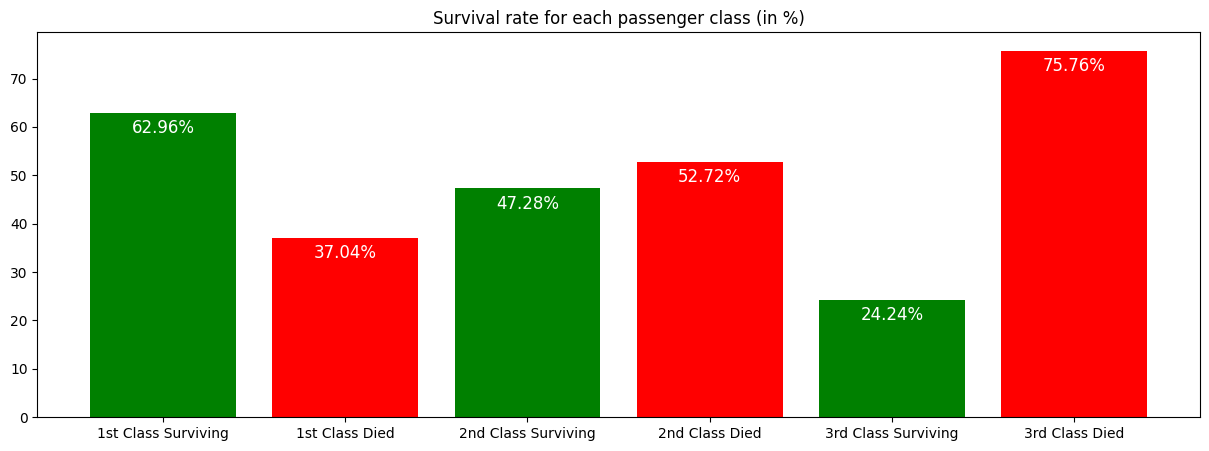

In [7]:
values = [
    firstClassSurvivalRatio * 100,
    (1 - firstClassSurvivalRatio) * 100,
    secondClassSurvivalRatio * 100,
    (1 - secondClassSurvivalRatio) * 100,
    thirdClassSurvivalRatio * 100,
    (1 - thirdClassSurvivalRatio) * 100
]

plt.figure(figsize=(15, 5))

labels = ["1st Class Surviving", "1st Class Died", "2nd Class Surviving", "2nd Class Died", "3rd Class Surviving", "3rd Class Died"]
bars = plt.bar(labels, values, color=['green', 'red', 'green', 'red', 'green', 'red'])
plt.title("Survival rate for each passenger class (in %)")

for bar, value in zip(bars, values):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() - 5, f'{value:.2f}%', ha='center', va='bottom', color='white', fontsize=12)


##### <u> Did gender influence your odd of surviving?</u>


Will we be able to observe a major discrepancy between the genders regarding survival rate?<br>
It is well known, that women and children have a higher priority when evacuating a ship or a plane. 
Indeed this question is a bit more complex, as a pure look at the gender distribution may be missleading.<br><br>
Therefore, the gender question will split: 
It will be treated in this category, as well as later on, while taking into account the age too, to account for the male children for instance.

In [8]:
malePassengers = df[df.Sex == "male"]
maleRatio = size(malePassengers)/totalPassengers

maleDead = df[(df["Sex"] == "male") & (df["Survived"] == 0)]
maleAlive = df[(df["Sex"] == "male") & (df["Survived"] == 1)]
maleSurvivalRatio = size(maleAlive) / size(malePassengers)

femalePassengers = df[df.Sex == "female"]
femaleRatio = size(femalePassengers)/totalPassengers

femaleDead = df[(df["Sex"] == "female") & (df["Survived"] == 0)]
femaleAlive = df[(df["Sex"] == "female") & (df["Survived"] == 1)]
femaleSurvivalRatio = size(femaleAlive) / size(femalePassengers)

data = [
    ["Male passengers", size(malePassengers), str(toPercent(maleRatio))+"%", size(maleAlive), size(maleDead), str(toPercent(maleSurvivalRatio))+"%"],
    ["Female passengers", size(femalePassengers), str(toPercent(femaleRatio))+"%", size(femaleAlive), size(femaleDead), str(toPercent(femaleSurvivalRatio))+"%"],
    ["Total", totalPassengers, "100.0%", size(passengersAlive), size(passengersDead), str(toPercent(size(passengersAlive)/totalPassengers))+"%"]
]

print("Repartition of passengers by sex:\n")
print(tabulate(data, headers = ["Sex", "Count", "Percentage", "Survived", "Dead", "Survival Rate"], tablefmt="grid"))

Repartition of passengers by sex:

+-------------------+---------+--------------+------------+--------+-----------------+
| Sex               |   Count | Percentage   |   Survived |   Dead | Survival Rate   |
+===================+=========+==============+============+========+=================+
| Male passengers   |     577 | 64.8%        |        109 |    468 | 18.9%           |
+-------------------+---------+--------------+------------+--------+-----------------+
| Female passengers |     314 | 35.2%        |        233 |     81 | 74.2%           |
+-------------------+---------+--------------+------------+--------+-----------------+
| Total             |     891 | 100.0%       |        342 |    549 | 38.4%           |
+-------------------+---------+--------------+------------+--------+-----------------+


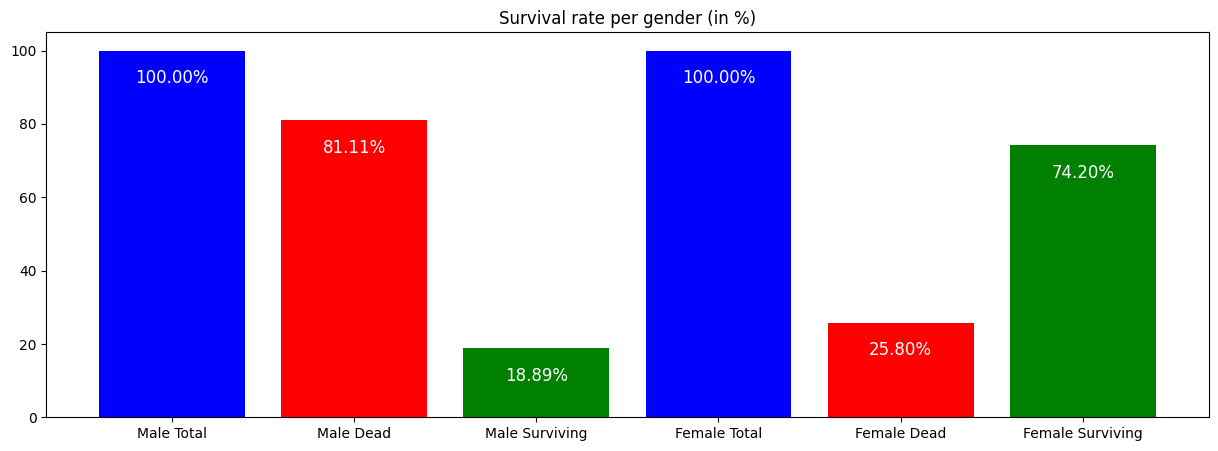

In [9]:
values = [
    1 * 100,
    (1 - maleSurvivalRatio) * 100,
    maleSurvivalRatio * 100,
    1 * 100,
    (1 - femaleSurvivalRatio) * 100,
    femaleSurvivalRatio * 100
]

plt.figure(figsize=(15, 5))
labels = ["Male Total", "Male Dead", "Male Surviving", "Female Total", "Female Dead", "Female Surviving"]
bars = plt.bar(labels, values, color=['blue', 'red', 'green', 'blue', 'red', 'green'])
plt.title("Survival rate per gender (in %)")

for bar, value in zip(bars, values):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() - 10, f'{value:.2f}%', ha='center', va='bottom', color='white', fontsize=12)


From that data, we see that:

1) There were more men than women on board of the titanic (About 65% of the passengers were male).
2) The survial ratio for male passengers was way smaller (19%) than for female passengers (74%). These numbers clearly indicate that women had priority, while boarding the rescue boats compared to men, regardless of their class.

From this point on, there is an obvious additional question. Where the "rare" saved male passengers children, rich people or just lucky passengers?

##### <u> Does the age of a passenger influence its survival odd?</u>

The sinking of the ship was probably quite stressful. Senior passengers probably had a harder time reaching the deck of the boat, as they usualy are weaker. Can we observe a high survival ratio for a specific "age class"? And what do the graphs of the surviving/dead male and female passengers look like? Are most of the male survivors children?

In [10]:
# Missing age information
noAgesGiven = df[df.Age.isnull()]

data = [
    ["Total passengers", size(df)],
    ["Passengers with age", size(df) - size(noAgesGiven)],
    ["Passengers without age", size(noAgesGiven)]
]

print("Age information:\n")
print(tabulate(data, headers=["Description", "Value"], tablefmt="grid"))

Age information:

+------------------------+---------+
| Description            |   Value |
+========================+=========+
| Total passengers       |     891 |
+------------------------+---------+
| Passengers with age    |     714 |
+------------------------+---------+
| Passengers without age |     177 |
+------------------------+---------+


Age repartion of all the passengers (not all the ages of the passengers were given, 177 were missing):

In [11]:
# All passengers
agesMixed = df["Age"].unique()
agesMixed = agesMixed[~np.isnan(agesMixed)]
counterMixed = [size(df[df.Age == val]) for val in agesMixed]

ageMales = malePassengers["Age"].unique()
ageMales = ageMales[~np.isnan(ageMales)]
counterMale = [size(df[(df["Age"] == val) & (df["Sex"] == "male")]) for val in ageMales]

ageFemale = femalePassengers["Age"].unique()
ageFemale = ageFemale[~np.isnan(ageFemale)]
counterFemale = [size(df[(df["Age"] == val) & (df["Sex"] == "female")]) for val in ageFemale]

print("All gender age:\n")
print(df["Age"].describe())

print("\nMale age:\n")
print(malePassengers["Age"].describe())

print("\nFemale age:\n")
print(femalePassengers["Age"].describe())


All gender age:

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

Male age:

count    453.000000
mean      30.726645
std       14.678201
min        0.420000
25%       21.000000
50%       29.000000
75%       39.000000
max       80.000000
Name: Age, dtype: float64

Female age:

count    261.000000
mean      27.915709
std       14.110146
min        0.750000
25%       18.000000
50%       27.000000
75%       37.000000
max       63.000000
Name: Age, dtype: float64


Text(0.5, 1.0, 'Females')

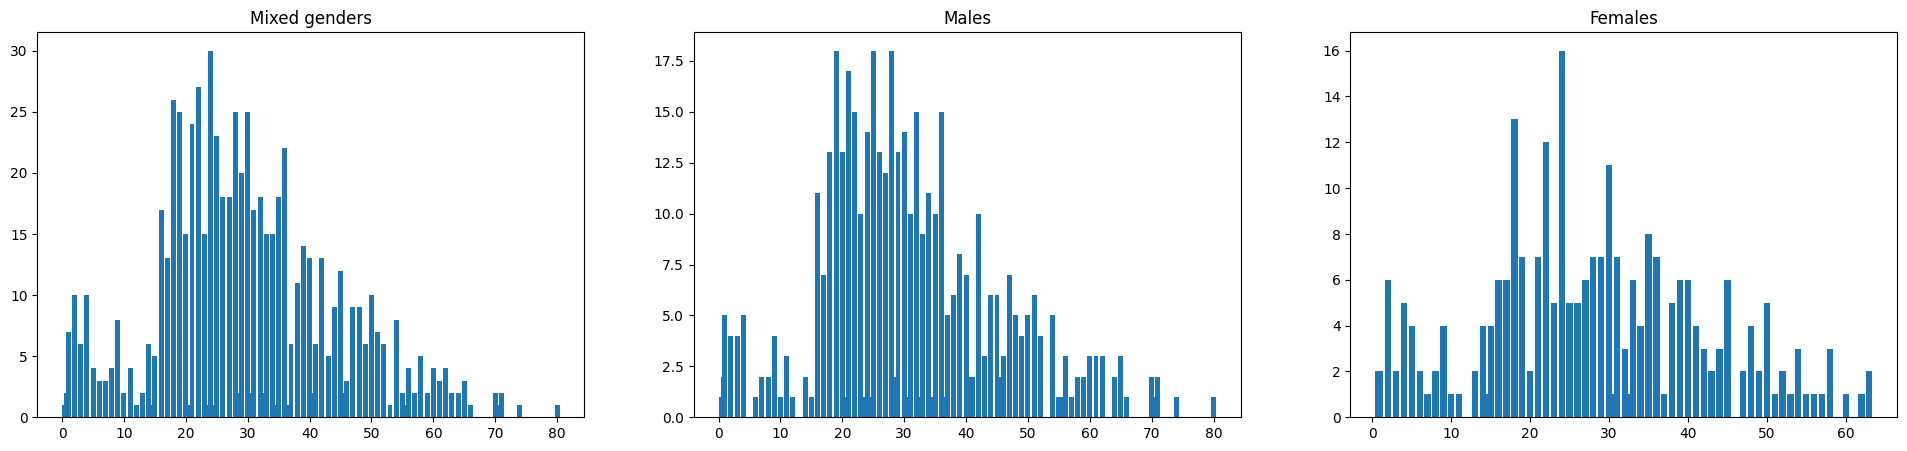

In [12]:
plt.figure(figsize=(24, 5))

plt.subplot(131)
plt.bar(agesMixed, counterMixed)
plt.title("Mixed genders")

plt.subplot(132)
plt.bar(ageMales, counterMale)
plt.title("Males")

plt.subplot(133)
plt.bar(ageFemale, counterFemale)
plt.title("Females")

We can see from those graphs, that the most prevalent male passenger age group was adults (from 18 to 35 years old). For female passengers the age classes were quite even, allthough we can also observe a bit higher presence of adult (from 18 to 35 years old).

How does the age repartition look like for deceased male and female passengers:

In [13]:
# Dead only
deads = df[df.Survived == 0]
agesMixedDead = deads["Age"].unique()
agesMixedDead = agesMixedDead[~np.isnan(agesMixedDead)]
counterMixedDead = [size(deads[deads.Age == val]) for val in agesMixedDead]

deadMales = df[(df.Survived == 0) & (df.Sex == "male")]
ageMalesDead = deadMales["Age"].unique()
ageMalesDead = ageMalesDead[~np.isnan(ageMalesDead)]
counterMaleDead = [size(deads[(deads["Age"] == val) & (deads["Sex"] == "male")]) for val in ageMalesDead]

deadFemales = df[(df.Survived == 0) & (df.Sex == "female")]
ageFemaleDead = deadFemales["Age"].unique()
ageFemaleDead = ageFemaleDead[~np.isnan(ageFemaleDead)]
counterFemaleDead = [size(deads[(deads["Age"] == val) & (deads["Sex"] == "female")]) for val in ageFemaleDead]

Dead passengers age:



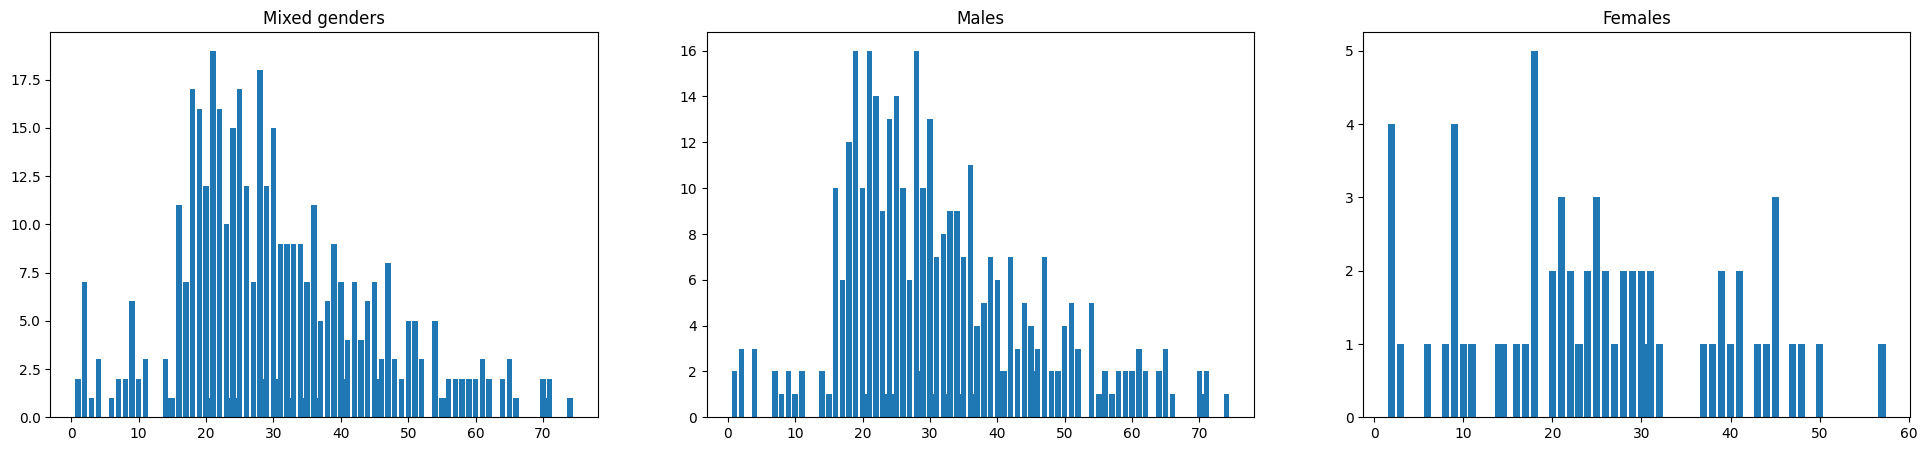

In [14]:
plt.figure(figsize=(24, 5))
plt.subplot(131)
plt.bar(agesMixedDead, counterMixedDead)
plt.title("Mixed genders")
plt.subplot(132)
plt.bar(ageMalesDead, counterMaleDead)
plt.title("Males")
plt.subplot(133)
plt.bar(ageFemaleDead, counterFemaleDead)
plt.title("Females")

print("Dead passengers age:\n")

We can observe that most of the deceased passengers (especialy true for male passengers) were adults, as they also represent the most prevalent passenger group. 

How does the age repartition look like for survivors:

In [15]:
# Alive only
alive = df[df.Survived == 1]
agesMixedAlive = alive["Age"].unique()
agesMixedAlive = agesMixedAlive[~np.isnan(agesMixedAlive)]
counterMixedAlive = [size(alive[alive.Age == val]) for val in agesMixedAlive]

aliveMales = df[(df.Survived == 0) & (df.Sex == "male")]
ageMalesAlive = aliveMales["Age"].unique()
ageMalesAlive = ageMalesAlive[~np.isnan(ageMalesAlive)]
counterMaleAlive = [size(alive[(alive["Age"] == val) & (alive["Sex"] == "male")]) for val in ageMalesAlive]

aliveFemales = df[(df.Survived == 0) & (df.Sex == "female")]
ageFemaleAlive = aliveFemales["Age"].unique()
ageFemaleAlive = ageFemaleAlive[~np.isnan(ageFemaleAlive)]
counterFemaleAlive = [size(alive[(alive["Age"] == val) & (alive["Sex"] == "female")]) for val in ageFemaleAlive]

Text(0.5, 1.0, 'Females')

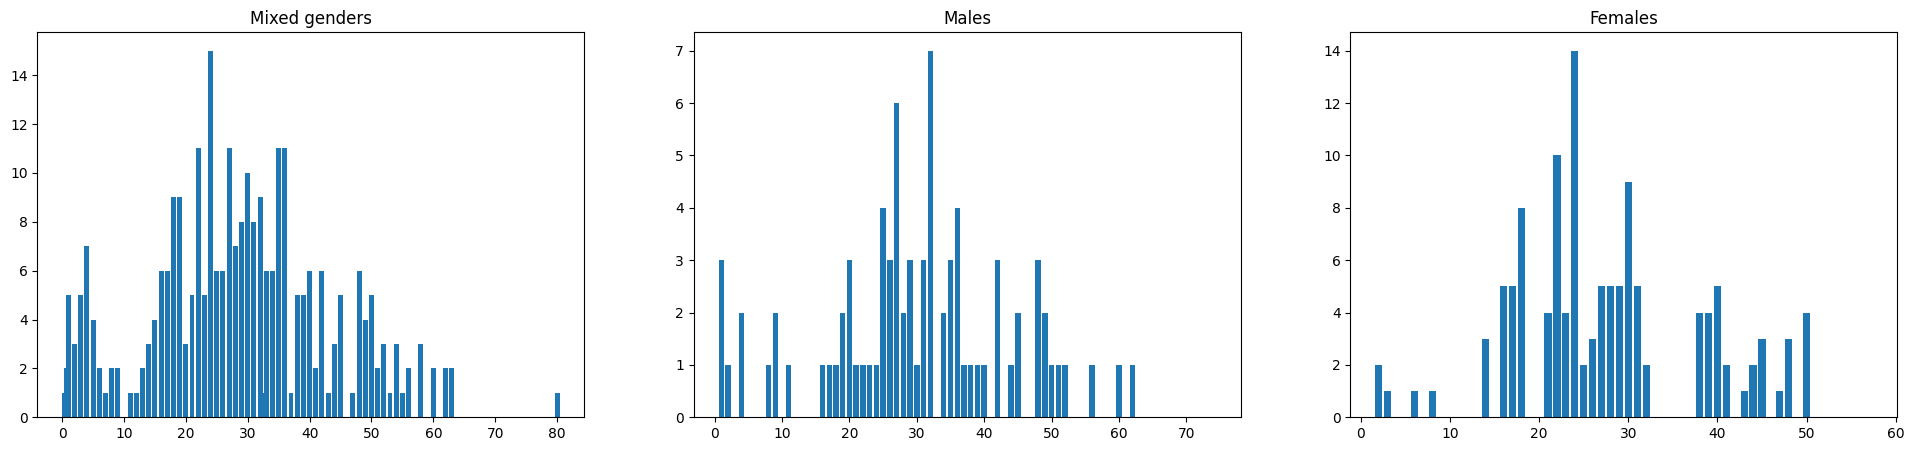

In [16]:
plt.figure(figsize=(24, 5))
plt.subplot(131)
plt.bar(agesMixedAlive, counterMixedAlive)
plt.title("Mixed genders")
plt.subplot(132)
plt.bar(ageMalesAlive, counterMaleAlive)
plt.title("Males")
plt.subplot(133)
plt.bar(ageFemaleAlive, counterFemaleAlive)
plt.title("Females")

As the survival rate for male passengers was quite low, it is hard to get any usable information from the graph about male passengers. In contrary, female passengers in adult age seem to have survived the most. 

Now that we have seen the age repartition for male and female survivors/deads, it would be interesting to analyse the survival rate per "age range":
- Children (0 -> 13)
- Teenagers (14 -> 18)
- Adults(18 -> 60)
- Senior Citizen (60 -> inf)

In [17]:
childrens = df[(df.Age <= 13)]
teenagers = df[(df.Age >= 14) & (df.Age < 18)]
adults = df[(df.Age >= 18) & (df.Age <= 60)]
seniors = df[(df.Age >= 61)]

childrenAlive = childrens[childrens.Survived == 1]
childrenDead = childrens[childrens.Survived == 0]

teenagersAlive = teenagers[teenagers.Survived == 1]
teenagersDead = teenagers[teenagers.Survived == 0]

adultsAlive = adults[adults.Survived == 1]
adultsDead = adults[adults.Survived == 0]

seniorsAlive = seniors[seniors.Survived == 1]
seniorsDead = seniors[seniors.Survived == 0]

In [18]:
data = [
    ["Children", size(childrens), size(childrenAlive), size(childrenDead), str(toPercent(size(childrenAlive)/size(childrens)))+"%"],
    ["Teenagers", size(teenagers), size(teenagersAlive), size(teenagersDead), str(toPercent(size(teenagersAlive)/size(teenagers)))+"%"],
    ["Adults", size(adults), size(adultsAlive), size(adultsDead), str(toPercent(size(adultsAlive)/size(adults)))+"%"],
    ["Seniors", size(seniors), size(seniorsAlive), size(seniorsDead), str(toPercent(size(seniorsAlive)/size(seniors)))+"%"]
]

print("Survival rate by age group:\n")
print(tabulate(data, headers=["Age group", "Total", "Survived", "Dead", "Survival Rate"], tablefmt="grid"))

Survival rate by age group:

+-------------+---------+------------+--------+-----------------+
| Age group   |   Total |   Survived |   Dead | Survival Rate   |
+=============+=========+============+========+=================+
| Children    |      71 |         42 |     29 | 59.2%           |
+-------------+---------+------------+--------+-----------------+
| Teenagers   |      42 |         19 |     23 | 45.2%           |
+-------------+---------+------------+--------+-----------------+
| Adults      |     579 |        224 |    355 | 38.7%           |
+-------------+---------+------------+--------+-----------------+
| Seniors     |      22 |          5 |     17 | 22.7%           |
+-------------+---------+------------+--------+-----------------+


<BarContainer object of 4 artists>

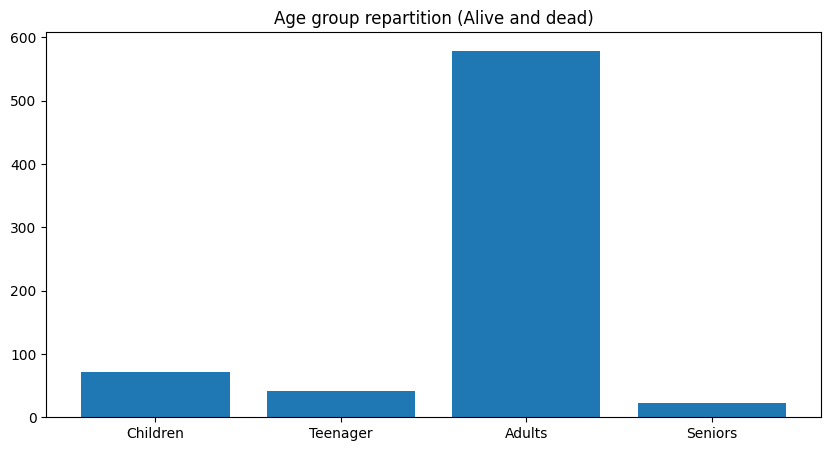

In [19]:
plt.figure(figsize=(10, 5))
plt.title("Age group repartition (Alive and dead)")
plt.bar(["Children","Teenager","Adults","Seniors"], [size(childrens),size(teenagers),size(adults),size(seniors)])

As evoked earlier on, the main age category on board of the titanic is adult age (from 18 to 60 years old). How do the different age ranges compare in regard of survival rate?

<BarContainer object of 8 artists>

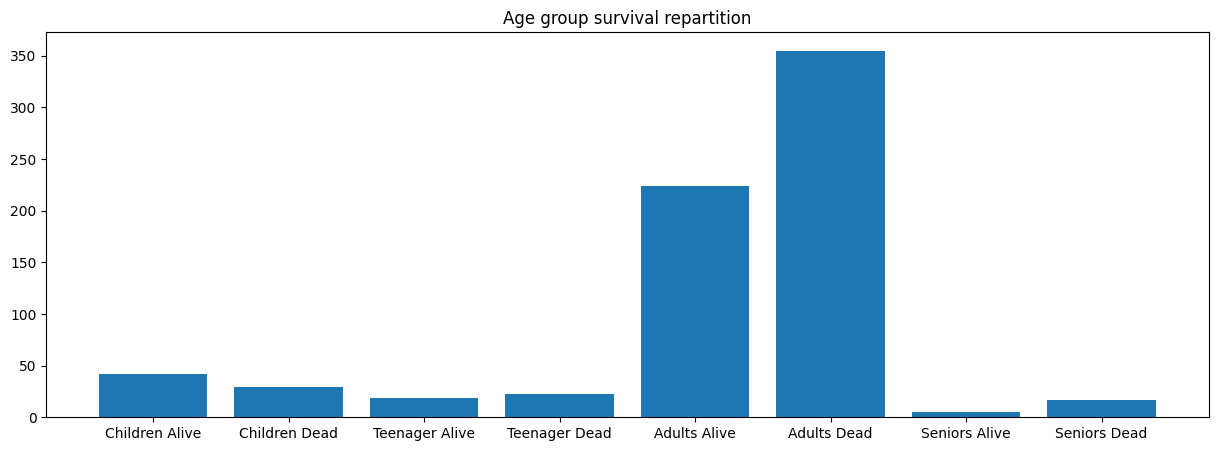

In [20]:
categories = ["Children Alive","Children Dead","Teenager Alive","Teenager Dead","Adults Alive","Adults Dead","Seniors Alive","Seniors Dead"]
values = [size(childrenAlive),size(childrenDead),size(teenagersAlive),size(teenagersDead),size(adultsAlive),size(adultsDead),size(seniorsAlive),size(seniorsDead)]

plt.figure(figsize=(15, 5))
plt.title("Age group survival repartition")
plt.bar(categories, values)

<BarContainer object of 8 artists>

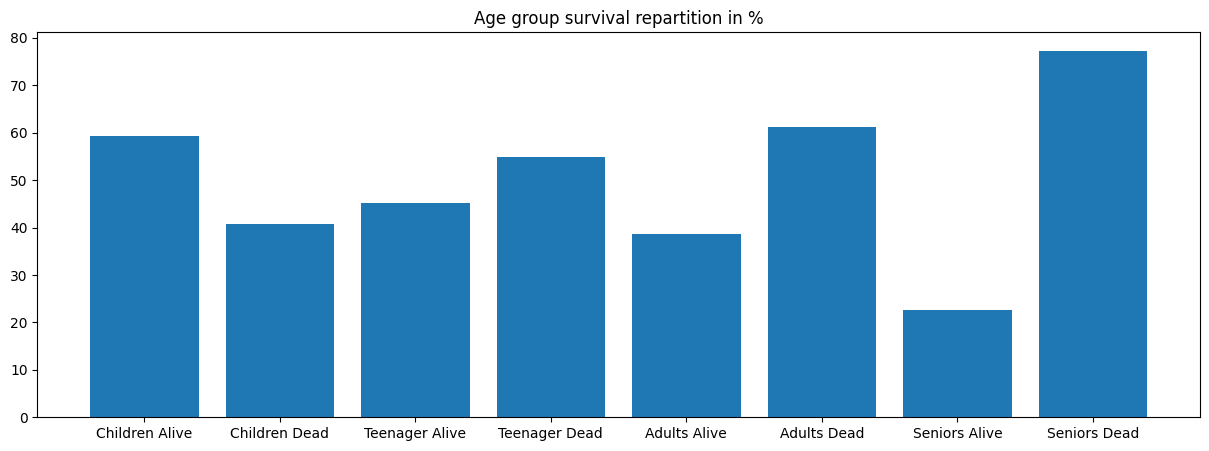

In [21]:
valuesPercent = [
    toPercent(size(childrenAlive)/+size(childrens)),
    toPercent(size(childrenDead)/size(childrens)),
    toPercent(size(teenagersAlive)/size(teenagers)),
    toPercent(size(teenagersDead)/size(teenagers)),
    toPercent(size(adultsAlive)/size(adults)),
    toPercent(size(adultsDead)/size(adults)),
    toPercent(size(seniorsAlive)/size(seniors)),
    toPercent(size(seniorsDead)/size(seniors))
]

plt.figure(figsize=(15, 5))
plt.title("Age group survival repartition in %")
plt.bar(categories, valuesPercent)

From that graph it is clearly visible, that children had a better chance of surviving (about 60%), and every age range afterwards has worse and worse survival ratios (teenager: about 45%, adults: about 40%, seniors: about 25%). This repartition clearly makes sense, as children (no matter their gender) had priority to board on a rescue boat, and the rest of the passengers were prioritized depending on their gender (mostly females). 
<br><br>
To check that hypothesis, we can determine the gender of surviving adults, as they represent the most prevalent group of passengers:

In [22]:
adultsMaleAlive = adultsAlive[adultsAlive.Sex == "male"]
adultsMaleDead = adultsDead[adultsDead.Sex == "male"]
adultsMale = adults[adults.Sex == "male"]

adultsFemaleAlive = adultsAlive[adultsAlive.Sex == "female"]
adultsFemaleDead = adultsDead[adultsDead.Sex == "female"]
adultsFemale = adults[adults.Sex == "female"]

print(f"Male adults alive: {size(adultsMaleAlive)}\nMale adults dead: {size(adultsMaleDead)}\nFemale adults alive: {size(adultsFemaleAlive)}\nFemale adults dead: {size(adultsFemaleDead)}")
print(f"\nMale total: {size(adultsMale)}\nFemale total: {size(adultsFemale)}")

Male adults alive: 68
Male adults dead: 308
Female adults alive: 156
Female adults dead: 47

Male total: 376
Female total: 203


<BarContainer object of 4 artists>

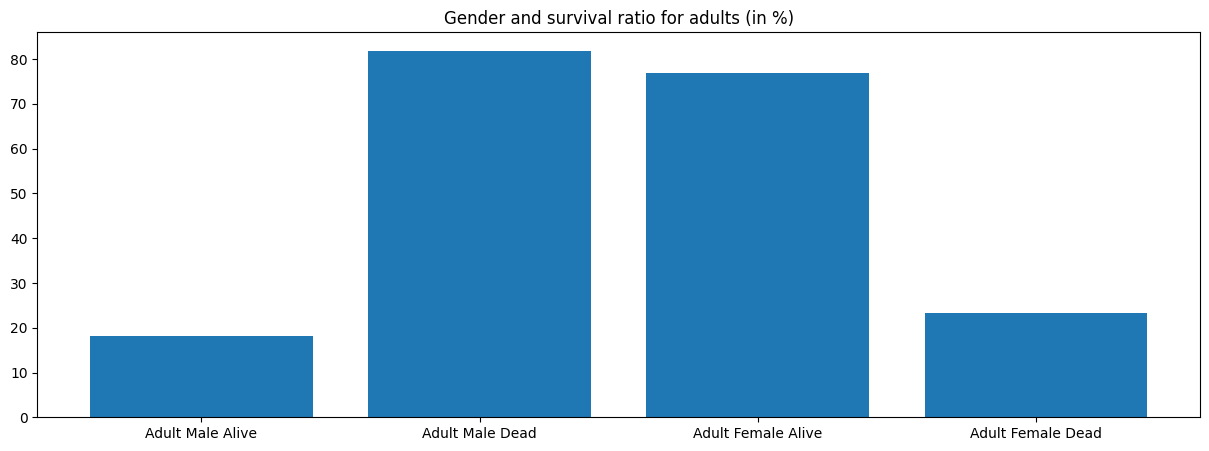

In [23]:
values = [toPercent(size(adultsMaleAlive)/size(adultsMale)),toPercent(size(adultsMaleDead)/size(adultsMale)),toPercent(size(adultsFemaleAlive)/size(adultsFemale)),toPercent(size(adultsFemaleDead)/size(adultsFemale))]
categories = ["Adult Male Alive","Adult Male Dead","Adult Female Alive","Adult Female Dead"]

plt.figure(figsize=(15, 5))
plt.title("Gender and survival ratio for adults (in %)")
plt.bar(categories, values)

Indeed it is very obvious that women were prioritized, as about only 20% of male passengers (including children) survived, compared to nearly 75% of female passengers.<br><br>

We can indeed observe a high survival ratio for children, as they probably got saved first together with women. We can therefore also notice that women had a way higher survival rate than men. In contrary to the starting hypothesis, that most of the male survivors would be children, we can clearly see on the graph of male survivors, that also adults got saved (probably first class passengers and richer passengers).

Compared to the passenger class or to the gender, the age doesn't provide a very accurate criteria, except children (high survival rate) and seniors (very low survival rate). Therefore, if we want to use the age as a criteria, it needs to be paired with the gender to be more "accurate".

##### <u>Did traveling alone increase your survival rate?</u>

In this section we are going to analyze both the traveling with:
- siblings / spouses
- parents / children

In a stressful scenario, it is important that people can focus. If the passengers had parents or children to take care of, they might get deconcentrated and thus this would reduce their surviving chances. Therefore, we may ask ourselves: Does traveling alone increase your survival odd? Do we observe a difference in survival rate depending on the number of relatives on board as well (SibSp + Parch)?

In [24]:
loneTraveller = df[df.SibSp + df.Parch == 0]
oneRelative = df[df.SibSp + df.Parch == 1]
twoRelative = df[df.SibSp + df.Parch == 2]
threeOrMoreRelative = df[df.SibSp + df.Parch >= 3]

print(f"Lone Traveller: {size(loneTraveller)}\nOne Relative Traveller: {size(oneRelative)}\nTwo Relative Traveller: {size(twoRelative)}\nThree or more Relative Traveller: {size(threeOrMoreRelative)}")

Lone Traveller: 537
One Relative Traveller: 161
Two Relative Traveller: 102
Three or more Relative Traveller: 91


As we can see from that data, most of the passengers did travel alone, without any siblings/spoused/parents or children.

In [25]:
loneSurvivor = loneTraveller[loneTraveller.Survived == 1]
loneDead = loneTraveller[loneTraveller.Survived == 0]

oneSurvivor = oneRelative[oneRelative.Survived == 1]
oneDead = oneRelative[oneRelative.Survived == 0]

twoSurvivor = twoRelative[twoRelative.Survived == 1]
twoDead = twoRelative[twoRelative.Survived == 0]

threeMoreSurvivor = threeOrMoreRelative[threeOrMoreRelative.Survived == 1]
threeMoreDead = threeOrMoreRelative[threeOrMoreRelative.Survived == 0]

print(f"Lone Traveller Survivor: {size(loneSurvivor)}\n\
Lone Traveller Deceased: {size(loneDead)}\n\n\
One Relative Survivor: {size(oneSurvivor)}\n\
One Relative Survivor: {size(oneDead)}\n\n\
Two Relative Survivor: {size(twoSurvivor)}\n\
Two Relative Survivor: {size(twoDead)}\n\n\
Three+ Relative Survivor: {size(threeMoreSurvivor)}\n\
Three+ Relative Survivor: {size(threeMoreDead)}\n")

Lone Traveller Survivor: 163
Lone Traveller Deceased: 374

One Relative Survivor: 89
One Relative Survivor: 72

Two Relative Survivor: 59
Two Relative Survivor: 43

Three+ Relative Survivor: 31
Three+ Relative Survivor: 60



In [26]:
loneTravellerSurvivalRatio = size(loneSurvivor)/size(loneTraveller)
oneTravellerSurvivalRatio = size(oneSurvivor)/size(oneRelative)
twoTravellerSurvivalRatio = size(twoSurvivor)/size(twoRelative)
threeTravellerSurvivalRatio = size(threeMoreSurvivor)/size(threeOrMoreRelative)

[30.4, 69.6, 55.3, 44.7, 57.8, 42.2, 34.1, 65.9]


Text(0.5, 1.0, 'Survival ratio depending on travel group size (in %)')

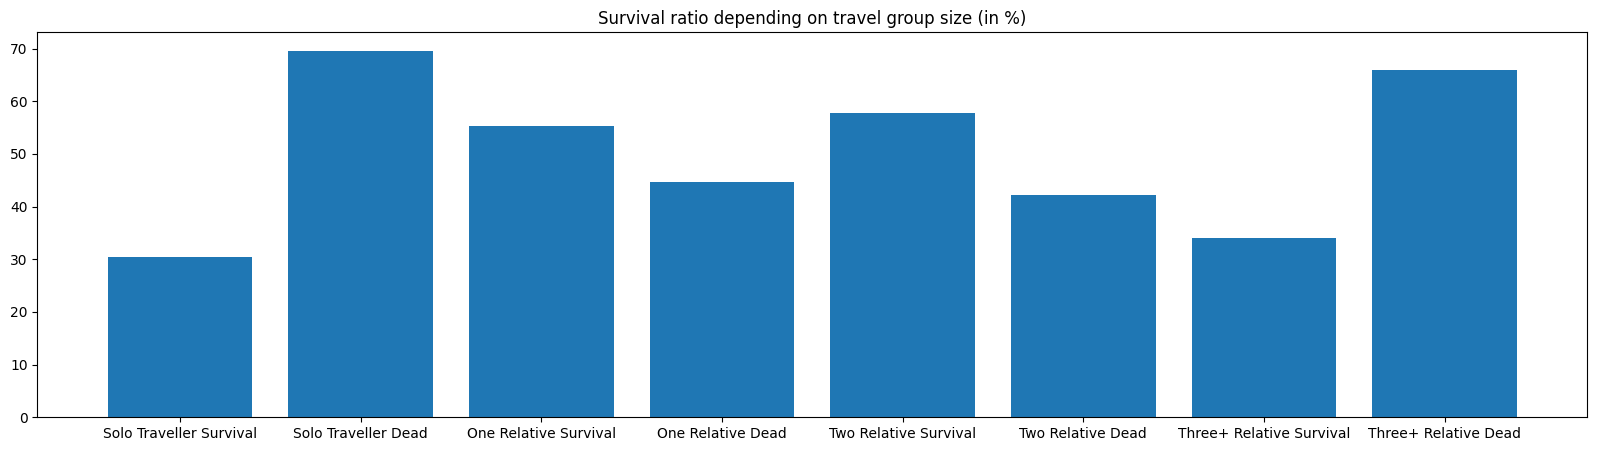

In [27]:
plt.figure(figsize=(20, 5))
values = [
        toPercent(loneTravellerSurvivalRatio),100-toPercent(loneTravellerSurvivalRatio),\
        toPercent(oneTravellerSurvivalRatio),100-toPercent(oneTravellerSurvivalRatio),\
        toPercent(twoTravellerSurvivalRatio),100-toPercent(twoTravellerSurvivalRatio),\
        toPercent(threeTravellerSurvivalRatio),100-toPercent(threeTravellerSurvivalRatio),
        ]

print(values)

plt.bar(["Solo Traveller Survival","Solo Traveller Dead","One Relative Survival","One Relative Dead","Two Relative Survival","Two Relative Dead","Three+ Relative Survival","Three+ Relative Dead",], values)
plt.title("Survival ratio depending on travel group size (in %)")

From the graph above, it seems like passengers had a higher survival chance, when travelling with one (55%) or two relatives (58%). In contrary, travelling alone (30%) or with three or more relatives (34%) significantly decreased the survival probability. <br>

Those numbers were not expected, there it would be interesting to determine, why the solo travellers did on average survive less frequently. One possibility would be that most solo travellers were male, and as we know only a very small percentage of male passengers did survive. This hypothesis is feasible, as, even though more common in the 1910s, women didn't travel as often alone as men did. The low survival ratio for 3+ relatives is way less surprising: Those passengers probably were families with parents and childrens, therefore they either had less ease to join the rescue boats, or they occupied seats in third class ([3rd class did survive way less](#udoes-the-passenger-class-influence-the-odd-of-survivingu)).

Let us analyse the gender repartition of lone travellers:

In [28]:
loneMaleSurvivor = loneSurvivor[loneSurvivor.Sex == "male"]
loneMaleDead = loneDead[loneDead.Sex == "male"]

loneFemaleSurvivor = loneSurvivor[loneSurvivor.Sex == "female"]
loneFemaleDead = loneDead[loneDead.Sex == "female"]

In [29]:
print(f"Lone traveller male survivor: {size(loneMaleSurvivor)}\n\
Lone traveller male dead: {size(loneMaleDead)}\n\n\
Lone traveller female survivor: {size(loneFemaleSurvivor)}\n\
Lone traveller female dead: {size(loneFemaleDead)}\n")

print(f"Lone Traveller Male survival ratio: {toPercent(size(loneMaleSurvivor)/size(loneTraveller[loneTraveller.Sex=='male']))}%\n\
Lone Traveller Female survival ratio: {toPercent(size(loneFemaleSurvivor)/size(loneTraveller[loneTraveller.Sex=='female']))}%")

Lone traveller male survivor: 64
Lone traveller male dead: 347

Lone traveller female survivor: 99
Lone traveller female dead: 27

Lone Traveller Male survival ratio: 15.6%
Lone Traveller Female survival ratio: 78.6%


Indeed our assumption, that most lone passengers were male, was correct, therefore the low survival rate of lone passengers is explained. It is allthough interesting to notice the high disparity between genders again, as only 15% of solo travelling male survived, compared to 78% for female passengers.

Therefore, we can conclude, that travelling alone doesn't increase or decrease your survival rate (the gender plays a more important role and is implicitly the deciding factor here again). In contrary, travelling as entire family (3+ relatives) does decrease your survival rate.

##### <u>Pay to survive, a valid concept in the Titanic?</u>

We have already analyzed the impact of the ticket class with survival rate. As a ticket of a higher class is typically associated to a higher price, we will probably observe similar results.

We may now for instance compute the average price for a ticket for survivors (total, male, female) to get a better idea of the correlations between price and sex as well.

In [30]:
survivors = df[df.Survived == 1]
deads = df[df.Survived == 0]

survivorsMale = df[(df.Survived == 1) & (df.Sex == "male")]
deadsMale = df[(df.Survived == 0) & (df.Sex == "male")]

survivorsFemale = df[(df.Survived == 1) & (df.Sex == "female")]
deadsFemale = df[(df.Survived == 0) & (df.Sex == "female")]

averageSurvivorTicketPrice = survivors["Fare"].mean()
averageDeadTicketPrice = deads["Fare"].mean()

print(f"Average ticket price for survivors: {averageSurvivorTicketPrice}\nAverage ticket price for deads: {averageDeadTicketPrice}")

averageSurvivorTicketPriceMale = survivorsMale["Fare"].mean()
averageDeadTicketPriceMale = deadsMale["Fare"].mean()

print(f"Average ticket price for male survivors: {averageSurvivorTicketPriceMale}\nAverage ticket price for male deads: {averageDeadTicketPriceMale}")

averageSurvivorTicketPriceFemale = survivorsFemale["Fare"].mean()
averageDeadTicketPriceFemale = deadsFemale["Fare"].mean()

print(f"Average ticket price for female survivors: {averageSurvivorTicketPriceFemale}\nAverage ticket price for female deads: {averageDeadTicketPriceFemale}")

Average ticket price for survivors: 48.39540760233918
Average ticket price for deads: 22.117886885245902
Average ticket price for male survivors: 40.82148440366972
Average ticket price for male deads: 21.96099294871795
Average ticket price for female survivors: 51.93857339055794
Average ticket price for female deads: 23.024385185185185


Now we can analyze the average fare for a given ticket class and compare the values.

In [31]:
firstClassTicketPrice = firstClass["Fare"].mean()
print(f"Average ticket price for first class: {firstClassTicketPrice}")

secondClassTicketPrice = secondClass["Fare"].mean()
print(f"Average ticket price for second class: {secondClassTicketPrice}")

thirdClassTicketPrice = thirdClass["Fare"].mean()
print(f"Average ticket price for third class: {thirdClassTicketPrice}")

Average ticket price for first class: 84.1546875
Average ticket price for second class: 20.662183152173913
Average ticket price for third class: 13.675550101832993


We can also compare the ticket price per Sex for a given class.

In [32]:
firstClassMaleTicketPrice = firstClass[(firstClass.Sex == "male")]["Fare"].mean()
firstClassFemaleTicketPrice = firstClass[(firstClass.Sex == "female")]["Fare"].mean()

print(f"Average ticket price for first class as a male: {firstClassMaleTicketPrice}\nAverage ticket price for first as a female class: {firstClassFemaleTicketPrice}")

secondClassMaleTicketPrice = secondClass[(secondClass.Sex == "male")]["Fare"].mean()
secondClassFemaleTicketPrice = secondClass[(secondClass.Sex == "female")]["Fare"].mean()

print(f"\nAverage ticket price for second class as a male: {secondClassMaleTicketPrice}\nAverage ticket price for second as a female class: {secondClassFemaleTicketPrice}")

thridClassMaleTicketPrice = thirdClass[(thirdClass.Sex == "male")]["Fare"].mean()
thirdClassFemaleTicketPrice = thirdClass[(thirdClass.Sex == "female")]["Fare"].mean()

print(f"\nAverage ticket price for third class as a male: {thridClassMaleTicketPrice}\nAverage ticket price for third as a female class: {thirdClassFemaleTicketPrice}")

Average ticket price for first class as a male: 67.22612704918032
Average ticket price for first as a female class: 106.12579787234043

Average ticket price for second class as a male: 19.74178240740741
Average ticket price for second as a female class: 21.97012105263158

Average ticket price for third class as a male: 12.661632564841499
Average ticket price for third as a female class: 16.118809722222224


We can see quite some differences, are those also confirmed in the statistical analysis if we compute Q1, mean value, median value and Q3?

In [33]:
firstClassMale = firstClass[firstClass.Sex == "male"]
firstClassFemale = firstClass[firstClass.Sex == "female"]

f_c_m_min = firstClassMale["Fare"].min()
f_c_m_q1 = firstClassMale["Fare"].quantile(0.25)
f_c_m_q3 = firstClassMale["Fare"].quantile(0.75)
f_c_m_mean = firstClassMale["Fare"].mean()
f_c_m_median = firstClassMale["Fare"].median()
f_c_m_max = firstClassMale["Fare"].max()

f_c_f_min = firstClassFemale["Fare"].min()
f_c_f_q1 = firstClassFemale["Fare"].quantile(0.25)
f_c_f_q3 = firstClassFemale["Fare"].quantile(0.75)
f_c_f_mean = firstClassFemale["Fare"].mean()
f_c_f_median = firstClassFemale["Fare"].median()
f_c_f_max = firstClassFemale["Fare"].max()

print(f"\nFirst class male: Min: {f_c_m_min} Q1: {f_c_m_q1}  Mean: {round(f_c_m_mean)} Median: {round(f_c_m_median)} Q3: {f_c_m_q3} Max: {f_c_m_max}")
print(f"\nFirst class female: Min: {f_c_f_min} Q1: {f_c_f_q1}  Mean: {round(f_c_f_mean)} Median: {round(f_c_f_median)} Q3: {f_c_f_q3} Max: {f_c_f_max}")


First class male: Min: 0.0 Q1: 27.7281  Mean: 67 Median: 41 Q3: 78.459375 Max: 512.3292

First class female: Min: 25.9292 Q1: 57.2448  Mean: 106 Median: 83 Q3: 134.5 Max: 512.3292


Text(0.5, 1.0, 'Female ticket price distribution in first class')

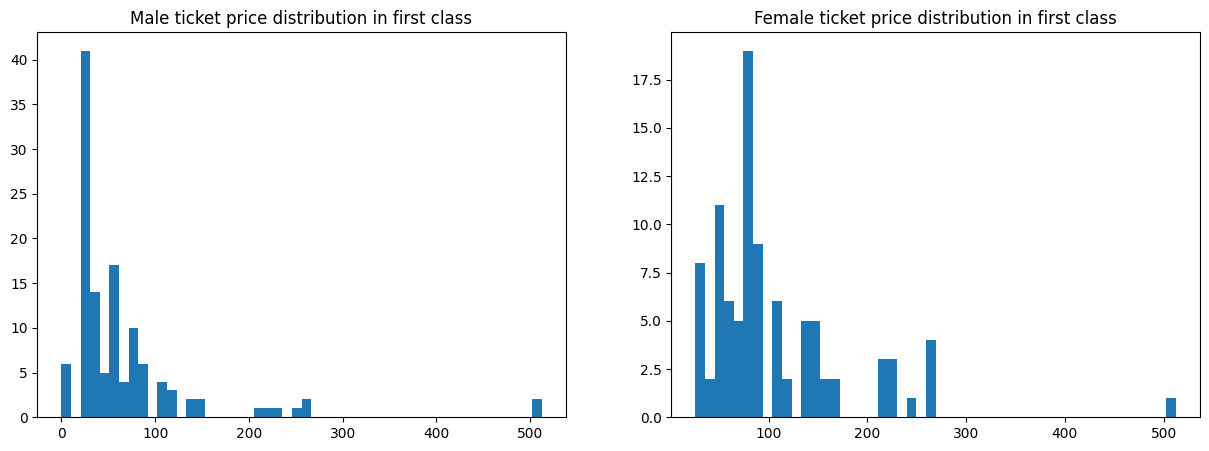

In [34]:
# Plot the price for firstClassMale and firstClassFemale, each price should have a count of tickets with that price
plt.figure(figsize=(15, 5))
plt.subplot(121)
plt.hist(firstClassMale["Fare"], bins=50)
plt.title("Male ticket price distribution in first class")

plt.subplot(122)
plt.hist(firstClassFemale["Fare"], bins=50)
plt.title("Female ticket price distribution in first class")

Generally speaking, we can observe a higher price for female passager no matter the ticket class, compared to male. As the fare attribute is quite similar to the ticket class, it can be ignored when building a decision tree for instance (for now).

#### <u>The origin port, does it make a difference?</u>

The passengers had to possibility to board at 3 different initial ports:

C = Cherbourg, Q = Queenstown, S = Southampton

The titanic first stopped at S, then at C and finally at Q.

Let us analyze the impact of the start port with the survival rate:

In [35]:
portS = df[df.Embarked == "S"]
portC = df[df.Embarked == "C"]
portQ = df[df.Embarked == "Q"]

print(f"Port S: {size(portS)}\nPort C: {size(portC)}\nPort Q: {size(portQ)}\n")

portSSurvivor = portS[portS.Survived == 1]
portSDead = portS[portS.Survived == 0]
portSSurvivalRatio = size(portSSurvivor)/size(portS)

portCSurvivor = portC[portC.Survived == 1]
portCDead = portC[portC.Survived == 0]
portCSurvivalRatio = size(portCSurvivor)/size(portC)

portQSurvivor = portQ[portQ.Survived == 1]
portQDead = portQ[portQ.Survived == 0]
portQSurvivalRatio = size(portQSurvivor)/size(portQ)

print(f"Port S survivor: {size(portSSurvivor)}\nPort S dead: {size(portSDead)}\nPort S survival ratio: {toPercent(portSSurvivalRatio)}%\n")
print(f"Port C survivor: {size(portCSurvivor)}\nPort C dead: {size(portCDead)}\nPort C survival ratio: {toPercent(portCSurvivalRatio)}%\n")
print(f"Port Q survivor: {size(portQSurvivor)}\nPort Q dead: {size(portQDead)}\nPort Q survival ratio: {toPercent(portQSurvivalRatio)}%\n")


Port S: 644
Port C: 168
Port Q: 77

Port S survivor: 217
Port S dead: 427
Port S survival ratio: 33.7%

Port C survivor: 93
Port C dead: 75
Port C survival ratio: 55.4%

Port Q survivor: 30
Port Q dead: 47
Port Q survival ratio: 39.0%



The port Cherbourg seems to have a higher survival rate, but the amount of passengers was not high, so we cannot conclude for sure about the surival rate using this attribute. We can nevertheless observe a very low survival rate for passengers boarding in Southampton.

Is this rate maybe related to the nature of the passengers (Sex, Ticket Class)?

In [36]:
portSFirstClass = portS[portS.Pclass == 1]
portSSecondClass = portS[portS.Pclass == 2]
portSThirdClass = portS[portS.Pclass == 3]

portCFirstClass = portC[portC.Pclass == 1]
portCSecondClass = portC[portC.Pclass == 2]
portCThirdClass = portC[portC.Pclass == 3]

portQFirstClass = portQ[portQ.Pclass == 1]
portQSecondClass = portQ[portQ.Pclass == 2]
portQThirdClass = portQ[portQ.Pclass == 3]

print(f"Port S first class: {size(portSFirstClass)}\nPort S second class: {size(portSSecondClass)}\nPort S third class: {size(portSThirdClass)}\n")
print(f"Port C first class: {size(portCFirstClass)}\nPort C second class: {size(portCSecondClass)}\nPort C third class: {size(portCThirdClass)}\n")
print(f"Port Q first class: {size(portQFirstClass)}\nPort Q second class: {size(portQSecondClass)}\nPort Q third class: {size(portQThirdClass)}\n")

Port S first class: 127
Port S second class: 164
Port S third class: 353

Port C first class: 85
Port C second class: 17
Port C third class: 66

Port Q first class: 2
Port Q second class: 3
Port Q third class: 72



By comparing the passenger class to the initial port, we have a very interesting observation regarding the port of Queenstown. Even though almost all passengers are from the third class, close to 40% survived. We may therefore compare for each port and class the survival rate:

In [37]:
portSFirstClassSurvivor = portSFirstClass[portSFirstClass.Survived == 1]
portSFirstClassDead = portSFirstClass[portSFirstClass.Survived == 0]
portSFirstClassSurvivalRatio = size(portSFirstClassSurvivor)/size(portSFirstClass)

portSSecondClassSurvivor = portSSecondClass[portSSecondClass.Survived == 1]
portSSecondClassDead = portSSecondClass[portSSecondClass.Survived == 0]
portSSecondClassSurvivalRatio = size(portSSecondClassSurvivor)/size(portSSecondClass)

portSThirdClassSurvivor = portSThirdClass[portSThirdClass.Survived == 1]
portSThirdClassDead = portSThirdClass[portSThirdClass.Survived == 0]
portSThirdClassSurvivalRatio = size(portSThirdClassSurvivor)/size(portSThirdClass)

print(f"Port S first class survival ratio: {toPercent(portSFirstClassSurvivalRatio)}%")
print(f"Port S second class survival ratio: {toPercent(portSSecondClassSurvivalRatio)}%")
print(f"Port S third class survival ratio: {toPercent(portSThirdClassSurvivalRatio)}%\n")

portCFirstClassSurvivor = portCFirstClass[portCFirstClass.Survived == 1]
portCFirstClassDead = portCFirstClass[portCFirstClass.Survived == 0]
portCFirstClassSurvivalRatio = size(portCFirstClassSurvivor)/size(portCFirstClass)

portCSecondClassSurvivor = portCSecondClass[portCSecondClass.Survived == 1]
portCSecondClassDead = portCSecondClass[portCSecondClass.Survived == 0]
portCSecondClassSurvivalRatio = size(portCSecondClassSurvivor)/size(portCSecondClass)

portCThirdClassSurvivor = portCThirdClass[portCThirdClass.Survived == 1]
portCThirdClassDead = portCThirdClass[portCThirdClass.Survived == 0]
portCThirdClassSurvivalRatio = size(portCThirdClassSurvivor)/size(portCThirdClass)

print(f"Port C first class survival ratio: {toPercent(portCFirstClassSurvivalRatio)}%")
print(f"Port C second class survival ratio: {toPercent(portCSecondClassSurvivalRatio)}%")
print(f"Port C third class survival ratio: {toPercent(portCThirdClassSurvivalRatio)}%\n")

portQFirstClassSurvivor = portQFirstClass[portQFirstClass.Survived == 1]
portQFirstClassDead = portQFirstClass[portQFirstClass.Survived == 0]
portQFirstClassSurvivalRatio = size(portQFirstClassSurvivor)/size(portQFirstClass)

portQSecondClassSurvivor = portQSecondClass[portQSecondClass.Survived == 1]
portQSecondClassDead = portQSecondClass[portQSecondClass.Survived == 0]
portQSecondClassSurvivalRatio = size(portQSecondClassSurvivor)/size(portQSecondClass)

portQThirdClassSurvivor = portQThirdClass[portQThirdClass.Survived == 1]
portQThirdClassDead = portQThirdClass[portQThirdClass.Survived == 0]
portQThirdClassSurvivalRatio = size(portQThirdClassSurvivor)/size(portQThirdClass)

print(f"Port Q first class survival ratio: {toPercent(portQFirstClassSurvivalRatio)}%")
print(f"Port Q second class survival ratio: {toPercent(portQSecondClassSurvivalRatio)}%")
print(f"Port Q third class survival ratio: {toPercent(portQThirdClassSurvivalRatio)}%\n")


Port S first class survival ratio: 58.3%
Port S second class survival ratio: 46.3%
Port S third class survival ratio: 19.0%

Port C first class survival ratio: 69.4%
Port C second class survival ratio: 52.9%
Port C third class survival ratio: 37.9%

Port Q first class survival ratio: 50.0%
Port Q second class survival ratio: 66.7%
Port Q third class survival ratio: 37.5%



Let us now take a look at the sex of the passengers for the different ports:

In [38]:
portSMale = portS[portS.Sex == "male"]
portSFemale = portS[portS.Sex == "female"]

portCMale = portC[portC.Sex == "male"]
portCFemale = portC[portC.Sex == "female"]

portQMale = portQ[portQ.Sex == "male"]
portQFemale = portQ[portQ.Sex == "female"]

print(f"Port S Male: {size(portSMale)}\nPort S Female: {size(portSFemale)}\n")
print(f"Port C Male: {size(portCMale)}\nPort C Female: {size(portCFemale)}\n")
print(f"Port Q Male: {size(portQMale)}\nPort Q Female: {size(portQFemale)}\n")

Port S Male: 441
Port S Female: 203

Port C Male: 95
Port C Female: 73

Port Q Male: 41
Port Q Female: 36



We can see that on port S there were mostly men (66%), on port C and Q way more even gender repartition.
This explains well why even for port Q, where almost all the passengers were from third class, quite a decent proportion survived.

Once again, gender seems to play quite a high impact on the survival rate combined with the ticket class.

If we think about it, there are reasonable explanation for the gender repartition (enhanced by doing a bit of internet research):

Port Southampton:
- Many crew members boarded at Southampton, and a significant portion of the crew were men.
- A large number of third-class passengers boarded at Southampton. During that period, third-class tickets were often purchased by men traveling alone or in groups, seeking work or new opportunities in America.
- The higher number of men in third class could also reflect the socioeconomic conditions, where men often migrated first, intending to send for their families later.

Port Cherbourg:
- Cherbourg was a stop primarily for first and third class passengers.
- The balance between male and female passengers is more even compared to Southampton, which can be attributed to the nature of travel for wealthier families and individuals who could afford first and second-class tickets.
- Wealthier passengers, including families, couples, and single travelers, often boarded at Cherbourg. This reflects a more balanced demographic between genders (and a bit higher male proportion likely due to the additional third class passengers)

Port Queenstown:
- Queenstown was primarily a stop for third-class passengers, many of whom were emigrants from Ireland:
- The relatively balanced number of male and female passengers reflects family groups and individuals traveling together to start new lives in America.
- The smaller total number of passengers from Queenstown compared to Southampton is due to the smaller capacity of the port and fewer available tickets for boarding there.

### <u>Now that we got the data, what can we do?</u>

#### <u>Decision Tree Version 1</u>

With all our data, let us recap what we found out about each attribute:
- PassengerId - Not relevant
- Passenger Class - Very important, will definitely be used for classification
- Name - Not relevant
- Sex - Very important, will definitely be used for classification
- Age - Not very signicative, except when combined with gender, or relevant for high children survival rate and low senior survival rate
- Number of siblings/spouses on Titanic - Relevant, decreases the survival rate if bigger group size or alone (due to most lone travelers being male)
- Number of parents/children on Titanic - Relevant, decreases the survival rate if bigger group size or alone (due to most lone travelers being male)
- Ticket Number - Not relevant
- Fare (Price paid) - Relevant, does strongly correlate with the passenger class, as higher class tickets were more pricey
- Cabin Number - Not relevant, not enough data to properly work with
- Embarkation Port - Relevant (but most likely is strongly tied to gender and ticket class once again)

Therefore, for our decision tree, we will be using following attributes:
- Sex
- Passenger Class
- Number of co-travelers
- Age
- Fare
- Embarkation port

The first 4 attributes can be viewed as quite independant, with the last two being strongly tied to either the passenger class or the gender and passenger class.

We can therefore create a new dataset containing only those attributes, and with fare for instance rounded.

In [39]:
df_copy = df.copy()
df_copy['CoTravelers'] = df_copy['SibSp'] + df_copy['Parch']
df_copy['Fare'] = df_copy['Fare'].round()
df_copy.dropna(subset=['Age'], inplace=True)
df_copy.dropna(subset=['Embarked'], inplace=True)
df_new = df_copy[['Survived', 'Pclass', 'Sex', 'Age', 'CoTravelers', 'Fare', 'Embarked']]
df_new.to_csv('Data/titanic_dataset_for_decision_tree_v1.csv', index=False, sep=';')
df_new.head()

,Survived,Pclass,Sex,Age,CoTravelers,Fare,Embarked
0,0,3,male,22.0,1,7.0,S
1,1,1,female,38.0,1,71.0,C
2,1,3,female,26.0,0,8.0,S
3,1,1,female,35.0,1,53.0,S
4,0,3,male,35.0,0,8.0,S


We got a precision of about 61%!

#### <u>Decision Tree Version 2</u>

We can now improve our previous shortcomings, being:
- Properly categorizing attributes in our trainingset already (sex => int, embarked => int)
- Take a look at dividing the fare and age into different categories ( < 50, 50 - 100, 100 - 200, > 200 for instance)

In [40]:
df_decision_tree_2 = df.copy()

# Drop columns
df_decision_tree_2.drop(['PassengerId','Ticket', 'Cabin', 'Name'], axis=1, inplace=True)

# Transform Sex into integer
df_decision_tree_2["Sex"] = df_decision_tree_2["Sex"].map({'male': 0, 'female': 1})
df_decision_tree_2["Embarked"] = df_decision_tree_2["Embarked"].map({'S': 0, 'C': 1, 'Q': 2})
df_decision_tree_2["Embarked"] = df_decision_tree_2["Embarked"].fillna(-1).astype(int)

# Compute relatives feature
df_decision_tree_2['Relatives'] = df_decision_tree_2['SibSp'] + df_decision_tree_2['Parch']
df_decision_tree_2.drop(['SibSp', 'Parch'], axis=1, inplace=True)

# Group fare into 4 categories, < 50, 50 - 100, 100 - 200, > 200
df_decision_tree_2['Fare'] = pd.cut(df_decision_tree_2['Fare'], bins=[0, 50, 100, 200, 1000], labels=[0, 1, 2, 3])

# Age split: Children (0 -> 13), Teenagers (14 -> 18), Adults(18 -> 60), Senior Citizen (60 -> inf)
df_decision_tree_2['Age'] = pd.cut(df_decision_tree_2['Age'], bins=[0, 13, 18, 60, 100], labels=[0, 1, 2, 3])

# For every row, any missing value will be replaced by 0
df_decision_tree_2_filling = df_decision_tree_2.copy()
df_decision_tree_2_filling.fillna(0, inplace=True)

df_decision_tree_2_filling.to_csv('Data/titanic_dataset_for_decision_tree_v2.csv', index=False, sep=';')
df_decision_tree_2_filling.head()


,Survived,Pclass,Sex,Age,Fare,Embarked,Relatives
0,0,3,0,2,0,0,1
1,1,1,1,2,1,1,1
2,1,3,1,2,0,0,0
3,1,1,1,2,1,0,1
4,0,3,0,2,0,0,0


By spliting the age and fare into distinct categories, we observed an increase to 70% (+ 9%)

#### <u>Decision Tree Version 3 + 4 + 5 + 6</u>

We will now use the same changes as for the decision tree version 2, but will additionaly have a better value replacement policy by:
- taking the most common value in this column (mode)
- taking the middle values in this column (median)
- using KNN (K-Nearest Neighbors Imputation)
- using MICE (Multivariate Imputation by Chained Equations)

In [41]:
df_decision_tree_3 = df_decision_tree_2.copy()

# List of columns to impute
columns_to_impute = ['Pclass', 'Sex', 'Age', 'Relatives', 'Fare', 'Embarked']

# Dictionary to store the most common values for each column
most_common_values = {}

# Impute missing values
for column in columns_to_impute:
    most_common_value = df_decision_tree_3[column].mode()[0]
    df_decision_tree_3[column] = df_decision_tree_3[column].fillna(most_common_value).astype(int) \
        if column != 'Embarked' else df_decision_tree_3[column].replace(-1, most_common_value)
    most_common_values[column] = most_common_value

# Save the cleaned DataFrame
df_decision_tree_3.to_csv('Data/titanic_dataset_for_decision_tree_v3.csv', index=False, sep=';')

# Prepare data for printing
data = [[f"Most common {col}", most_common_values[col]] for col in columns_to_impute]

# Print the most common values
print("Most common values:\n")
print(tabulate(data, headers=["Feature", "Value"], tablefmt="grid"))

Most common values:

+-----------------------+---------+
| Feature               |   Value |
+=======================+=========+
| Most common Pclass    |       3 |
+-----------------------+---------+
| Most common Sex       |       0 |
+-----------------------+---------+
| Most common Age       |       2 |
+-----------------------+---------+
| Most common Relatives |       0 |
+-----------------------+---------+
| Most common Fare      |       0 |
+-----------------------+---------+
| Most common Embarked  |       0 |
+-----------------------+---------+


In [42]:
df_decision_tree_4 = df_decision_tree_2.copy()

# List of columns to impute
columns_to_impute = ['Pclass', 'Sex', 'Age', 'Relatives', 'Fare', 'Embarked']

# Dictionary to store the mean values for each column
mean_values = {}

# Ensure all columns are treated as numerical and impute missing values with the mean
for column in columns_to_impute:
    # Convert to numerical type if necessary
    df_decision_tree_4[column] = pd.to_numeric(df_decision_tree_4[column], errors='coerce')
    # Calculate the mean
    mean_value = int(df_decision_tree_4[column].mean())
    # Fill missing values with the mean
    df_decision_tree_4[column] = df_decision_tree_4[column].fillna(mean_value).astype(int)
    mean_values[column] = mean_value

# Save the cleaned DataFrame
df_decision_tree_4.to_csv('Data/titanic_dataset_for_decision_tree_v4.csv', index=False, sep=';')

# Prepare data for printing
data = [[f"Mean {col}", mean_values[col]] for col in columns_to_impute]

# Print the mean values
print("Mean values:\n")
print(tabulate(data, headers=["Feature", "Value"], tablefmt="grid"))

Mean values:

+----------------+---------+
| Feature        |   Value |
+================+=========+
| Mean Pclass    |       2 |
+----------------+---------+
| Mean Sex       |       0 |
+----------------+---------+
| Mean Age       |       1 |
+----------------+---------+
| Mean Relatives |       0 |
+----------------+---------+
| Mean Fare      |       0 |
+----------------+---------+
| Mean Embarked  |       0 |
+----------------+---------+


In [43]:
from sklearn.impute import KNNImputer

df_decision_tree_5 = df_decision_tree_2.copy()

# List of columns to impute
columns_to_impute = ['Pclass', 'Sex', 'Age', 'Relatives', 'Fare', 'Embarked']

# Select only the columns to impute
df_to_impute = df_decision_tree_5[columns_to_impute]

# Initialize the KNNImputer
imputer = KNNImputer(n_neighbors=5)

# Perform KNN imputation
imputed_data = imputer.fit_transform(df_to_impute)

# Convert the imputed data back to a DataFrame
df_imputed = pd.DataFrame(imputed_data, columns=columns_to_impute)

# Round imputed values to integers
df_imputed = df_imputed.round(0).astype(int)

# Update the original DataFrame with imputed values
df_decision_tree_5[columns_to_impute] = df_imputed

# Save the cleaned DataFrame
df_decision_tree_5.to_csv('Data/titanic_dataset_for_decision_tree_v5.csv', index=False, sep=';')

/opt/miniconda3/envs/py310/lib/python3.10/site-packages/pandas/core/arrays/base.py:568: RuntimeWarning: invalid value encountered in cast
  result = np.asarray(self, dtype=dtype)
/opt/miniconda3/envs/py310/lib/python3.10/site-packages/pandas/core/arrays/base.py:568: RuntimeWarning: invalid value encountered in cast
  result = np.asarray(self, dtype=dtype)
/opt/miniconda3/envs/py310/lib/python3.10/site-packages/pandas/core/arrays/base.py:568: RuntimeWarning: invalid value encountered in cast
  result = np.asarray(self, dtype=dtype)
/opt/miniconda3/envs/py310/lib/python3.10/site-packages/pandas/core/arrays/base.py:568: RuntimeWarning: invalid value encountered in cast
  result = np.asarray(self, dtype=dtype)


In [44]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
import pandas as pd

df_decision_tree_6 = df_decision_tree_2.copy()

columns_to_impute = ['Pclass', 'Sex', 'Age', 'Relatives', 'Fare', 'Embarked']

df_decision_tree_6['Sex'] = df_decision_tree_6['Sex'].astype('category').cat.codes
df_decision_tree_6['Embarked'] = df_decision_tree_6['Embarked'].astype('category').cat.codes

imputer = IterativeImputer()
df_decision_tree_6[columns_to_impute] = imputer.fit_transform(df_decision_tree_6[columns_to_impute])

df_decision_tree_6[columns_to_impute] = df_decision_tree_6[columns_to_impute].round().astype(int)

df_decision_tree_6.to_csv('Data/titanic_dataset_for_decision_tree_v6.csv', index=False, sep=';')


/opt/miniconda3/envs/py310/lib/python3.10/site-packages/pandas/core/arrays/base.py:568: RuntimeWarning: invalid value encountered in cast
  result = np.asarray(self, dtype=dtype)


Even after using KNN and MICE, we get the same result, as when we filled any values with 0 instead, all reaching about 70% accuracy.

#### <u>Decision Tree Version 7</u>

In order to push our score potentially even higher, we may try out feature engineering. We may introduce two new features:
- isAlone: The passenger is travelling alone
- title: A title extracted from the name column

In [45]:
df_decision_tree_7 = df_decision_tree_2_filling.copy()

df_decision_tree_7['IsAlone'] = (df_decision_tree_7['Relatives'] == 0).astype(int)
df_decision_tree_7['Name'] = df['Name']

df_decision_tree_7['Title'] = df_decision_tree_7['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())
df_decision_tree_7['Title'] = df_decision_tree_7['Title'].replace('', 'None')
df_decision_tree_7['Title'] = df_decision_tree_7['Title'].apply(lambda x: x if x in ['Mr', 'Mrs', 'Miss', 'Master', 'None'] else 'Other')
df_decision_tree_7['Title'] = df_decision_tree_7['Title'].map({'Mr': 1, 'Mrs': 2, 'Miss': 3, 'Master': 4, 'Other': 5})

df_decision_tree_7.drop('Name', axis=1, inplace=True)

df_decision_tree_7.to_csv('Data/titanic_dataset_for_decision_tree_v7.csv', index=False, sep=';')


Through the new 2 features we have made, we have achieved an increase to almost 73-74%.

#### <u>SVM</u>

Let us use the same processed dataset for a Support Vector Machine model!


In [46]:
df_svm = df_decision_tree_7.copy()
df_svm.to_csv('Data/titanic_dataset_for_svm.csv', index=False, sep=';')

We have reached an accuracy of almost 77% by only exchanging Decision Trees with a SVM. What other machine learning models would be suitable?

#### <u>kNN</u>
Let us again use the same preprocessed dataset for a kNN model!


In [47]:
df_knn = df_decision_tree_7.copy()
df_knn.to_csv('Data/titanic_dataset_for_knn.csv', index=False, sep=';')

#### <u>Logistic regression</u>

In [48]:
df_log_reg = df_decision_tree_7.copy()
df_log_reg.to_csv('Data/titanic_dataset_for_log_reg.csv', index=False, sep=';')

#### <u>Random Forest</u>


In [49]:
df_random_forest = df_decision_tree_7.copy()
df_random_forest.to_csv('Data/titanic_dataset_for_random_forest.csv', index=False, sep=';')

#### <u>Gradient Boosting</u>


In [50]:
df_gradient_boosting = df_decision_tree_7.copy()
df_gradient_boosting.to_csv('Data/titanic_dataset_for_gradient_boosting.csv', index=False, sep=';')

## <u>Sources</u>

[Wayne Hall, Social class and survival on the S.S. Titanic, 1986](http://dx.doi.org/10.1016/0277-9536(86)90041-9)